# Lab 3 - Exploratory Statistics

This lab will build on lab 2 that analyzed a dataset detailing home sales. It will explore various aspects of the data, such as sale prices, asking prices, property sizes, and additional features like the number of bedrooms, bathrooms, sqft, and whether or not it has a view. Through statistics, distribution analysis, and coorelation studies, it will reveal insights into the housing market.

# Import libraries

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import sympy
import pandas as pd
import seaborn as sns


In [ ]:
from google.colab import drive #mount drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import data

In [ ]:
path_data = "/content/drive/MyDrive/CS 356/homes.csv" # path to the data on my drive
data = pd.read_csv(path_data, header=1) # read the csv file
pd.set_option('display.max_columns', None) #ensures all columns are printed
data


,zipcode,district,sqft,numbedrooms,numbathrooms,floors,view,saleprice,askingprice
0,95141,west,1373,7,1.0,3,False,695,698
1,91312,south,3261,6,2.0,2,False,902,906
2,94555,north,1835,3,3.0,3,True,888,892
3,95141,east,2833,6,2.5,2,True,927,932
4,96334,south,2742,6,2.5,2,False,872,876
...,...,...,...,...,...,...,...,...,...
143,95141,north,2236,1,1.0,2,False,702,705
144,95141,south,2061,7,3.0,1,False,764,768
145,98755,south,3561,3,2.5,3,True,1070,1075
146,94555,east,2143,3,1.0,2,False,694,697


In [ ]:
print(data.info()) #prints summary of the dataframe
#data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   zipcode       148 non-null    int64  
 1   district      148 non-null    object 
 2   sqft          148 non-null    int64  
 3   numbedrooms   148 non-null    int64  
 4   numbathrooms  148 non-null    float64
 5   floors        148 non-null    int64  
 6   view          148 non-null    bool   
 7   saleprice     148 non-null    int64  
 8   askingprice   148 non-null    int64  
dtypes: bool(1), float64(1), int64(6), object(1)
memory usage: 9.5+ KB
None


# About data


The homes dataset has 149 entries, each corresponding to a unique property listing. There are no missing values in the dataset. The dataset features the following columns:

Zipocode: Catergorical, represents postal code of address. It is an integer

District: Catergorical, denotes the district where the property is located. It is a string.

sqft: Numerical, the total square footage of the property. It is an integer.

numbedrooms: Numerical, the number of bedrooms in the property. It is an integer.

numbathrooms: Numerical, the number of bathrooms in the property. Has decimal points, which accounts for half-bathrooms (i.e. without a shower)

floors: Numerical, the total number of floors in the poroperty. It is an integer.

view: Categorical, represented as a boolean indicating whether or not the property has a view

saleprice: Numerical, the sale price of the property. It is an integer. (Why isn't it a float???). Based on the zip codes (which are in the bay area), I'm going to assume the prices are in the hundreds of thousands - millions.

askingprice: Numerical, the initial asking price of the property. It is an integer.

# Summary Statistics


## What is the average sale price and asking price?

In [ ]:
# Calculate the average sale price
average_sale_price = data['saleprice'].mean()

# Calculate the average asking price
average_asking_price = data['askingprice'].mean()
price_difference = average_asking_price - average_sale_price

# Print the results
print(f"Average Sale Price: ${average_sale_price:,.2f}k")
print(f"Average Asking Price: ${average_asking_price:,.2f}k")
print(f"On average, properties sell for {price_difference:,.2f}k less than their asking price.")


Average Sale Price: $836.65k
Average Asking Price: $840.50k
On average, properties sell for 3.85k less than their asking price.


##What is the median square footage of the properties?

In [ ]:
# Calculate the median sqaure footage
median_square_footage = data['sqft'].median()

# Print the results
print(f"Median Square Footage: {median_square_footage:,.2f}")


Median Square Footage: 2,624.00


##What is the most common number of bedrooms and bathrooms?

In [ ]:
# Calculate the most common number of bedrooms and bathrooms using the mode and selecting the first mode in the set returned
common_bedrooms = data['numbedrooms'].mode()[0]
average_bedrooms = data['numbedrooms'].mean()
common_bathrooms = data['numbathrooms'].mode()[0]
average_bathrooms = data['numbathrooms'].mean()

# Print the results
print(f"Most Common Number of Bedrooms: {common_bedrooms}")
print(f"The Average Number of Bedrooms is: {average_bedrooms:,.0f}\n")

print(f"Most Common Number of Bathrooms: {common_bathrooms}")
print(f"The Average Number of Bathrooms is: {average_bathrooms:,.0f}")

Most Common Number of Bedrooms: 6
The Average Number of Bedrooms is: 4

Most Common Number of Bathrooms: 1.5
The Average Number of Bathrooms is: 2


##What is the range of sale prices and asking prices?

In [ ]:
# Calculate the range by subtracting the min from the max.
range_sale_prices = data['saleprice'].max() - data['saleprice'].min()
range_asking_prices = data['askingprice'].max() - data['askingprice'].min()

# Print the results
print(f"Range of Sale Prices: ${range_sale_prices}k")
print(f"Range of Asking Prices: ${range_asking_prices}k")


Range of Sale Prices: $601k
Range of Asking Prices: $603k


##Distribution analysis: How are sale prices distributed across different districts?

          count        mean         std    min     25%    50%     75%     max
district                                                                     
east       33.0  841.030303  137.639131  532.0  759.00  866.0  938.00  1064.0
north      32.0  804.812500  118.887705  587.0  730.50  804.0  893.75  1014.0
south      44.0  835.045455  123.681127  597.0  724.75  858.5  919.25  1070.0
west       39.0  860.871795  140.107699  547.0  758.50  858.0  971.50  1133.0


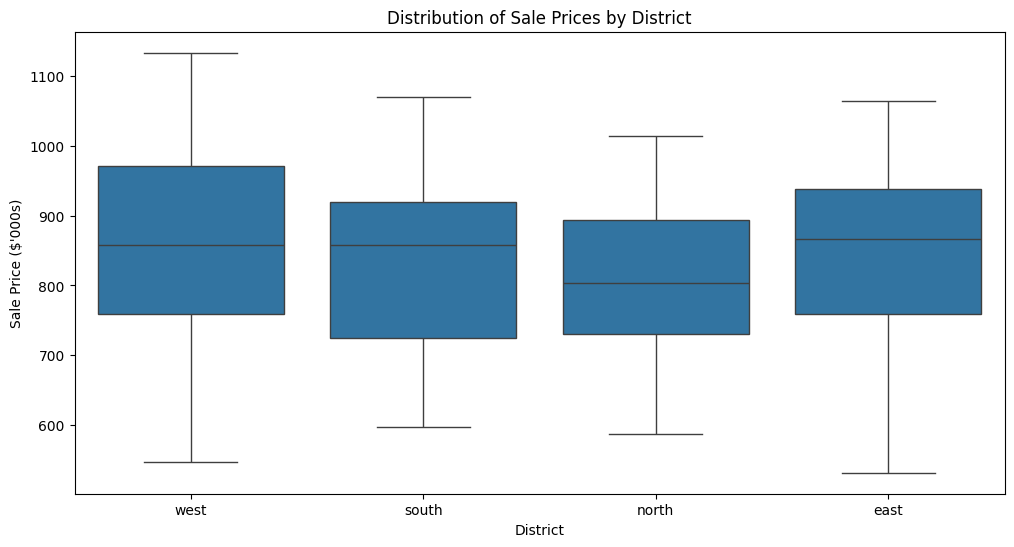

In [ ]:
# Group by district and calculate summary statistics
district_summary = data.groupby('district')['saleprice'].describe()
print(district_summary)

# Boxplot of sale prices by district
plt.figure(figsize=(12, 6))
sns.boxplot(x='district', y='saleprice', data=data)
plt.title('Distribution of Sale Prices by District')
plt.xlabel('District')
plt.ylabel('Sale Price ($\'000s)')
plt.show()


The East district has a moderate range of prices around an average of 841.03k, and the prices ranging from 532k to 1.064 million, indicating a diverse market. The North district has a slightly lower average price of 804.81k with a less variability. The South district has a higher median price, with more higher-priced homes within its 44 listings. The West district has the highest average sale price of 860.87k and the greatest price variability.

##Is there a relationship between the number of bedrooms and the sale price?

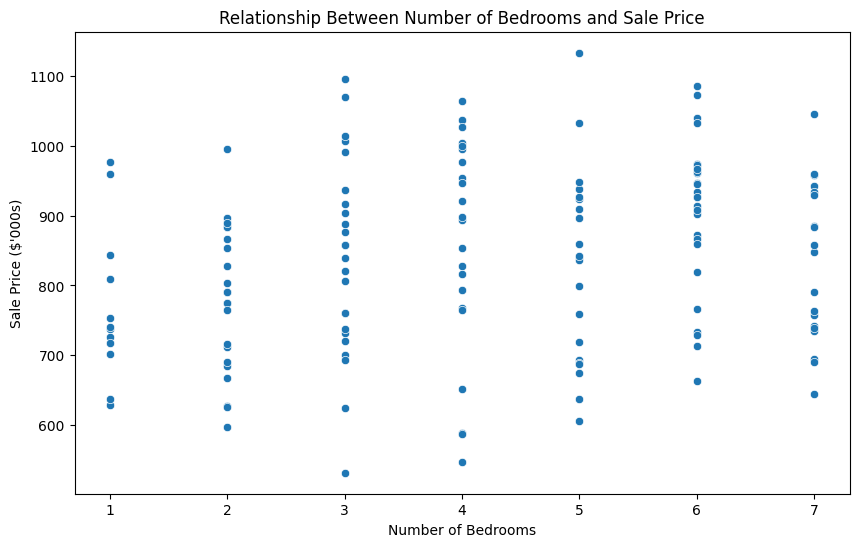

Correlation coefficient between number of bedrooms and sale price: 0.21


In [ ]:
# Plotting the relationship between number of bedrooms and sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numbedrooms', y='saleprice', data=data)
plt.title('Relationship Between Number of Bedrooms and Sale Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price ($\'000s)')
plt.show()

# Calculating correlation coefficient
correlation = data['numbedrooms'].corr(data['saleprice'])
print(f"Correlation coefficient between number of bedrooms and sale price: {correlation:,.2}")


### Better representation of the Relationship between Number of Bedrooms and Average Sale Price

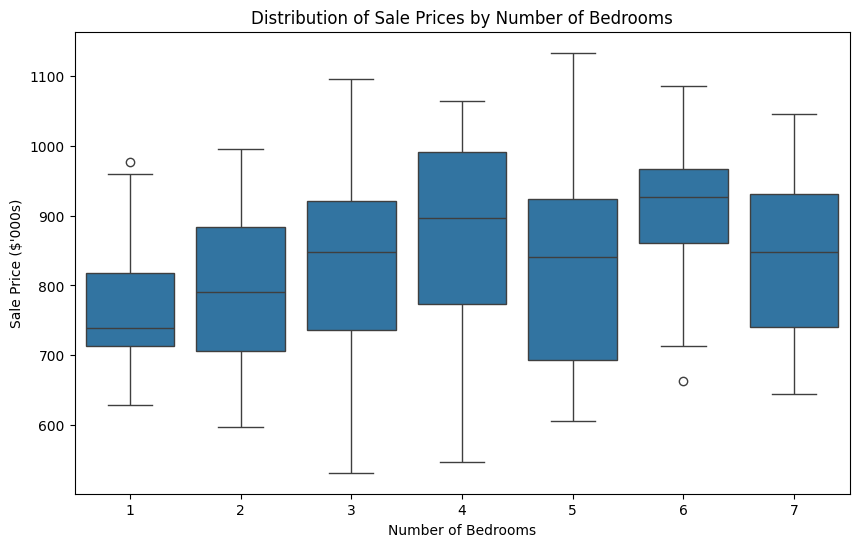

Correlation coefficient between number of bedrooms and mean sale price: 0.70


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='numbedrooms', y='saleprice', data=data)
plt.title('Distribution of Sale Prices by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price ($\'000s)')
plt.show()


# Calculating correlation coefficient of the means
mean_prices = data.groupby('numbedrooms')['saleprice'].mean().reset_index()

# Calculate the correlation coefficient from the mean prices
correlation = mean_prices['numbedrooms'].corr(mean_prices['saleprice'])
print(f"Correlation coefficient between number of bedrooms and mean sale price: {correlation:.2f}")




With a coorelation coefficient of 0.7, there is a relationship between the mean sale price and the number of bedrooms. For 1, 2, 3, 4 bedrooms, the sale price went up as the number of bedrooms increased. However, it went down for 5 bedrooms and back up for 6, and then back down for 7 bedrooms.

##How do the square footage and sale price correlate?

In [ ]:
slope, intercept = np.polyfit(data['sqft'], data['saleprice'], 1)

# Plotting square footage against sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft', y = 'saleprice', data=data)
plt.plot(data['sqft'], slope*data['sqft'] + intercept, color='red', label='Regression Line')
plt.title('Sale Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Sale Price ($\'000s)')
plt.show()

# Calculating correlation coefficient
correlation_sqft_saleprice = data['sqft'].corr(data['saleprice'])
print(f"Correlation coefficient between square footage and sale price: {correlation_sqft_saleprice:,.2}")

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

NameError: name 'np' is not defined

With a correlation coefficient of 0.85. There is a coorelation between the square footage and the sale price. Where properties with more square footage have a higher sales price. Additionally, with an intercept of 513.9, this tells us that the expected sales price of land, or when the square footage is 0 is $$513,893. And, on average, the sale price increases by $123 by each extra square foot.

##Are there any outliers in the data? NaNs?

In [ ]:
# Check for NaN values
nans = data.isna().sum()
print(nans)

# statistics
data.describe()


zipcode         0
district        0
sqft            0
numbedrooms     0
numbathrooms    0
floors          0
view            0
saleprice       0
askingprice     0
dtype: int64


,zipcode,sqft,numbedrooms,numbathrooms,floors,saleprice,askingprice
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,95146.270270,2627.175676,4.148649,1.925676,1.925676,836.648649,840.500000
std,2455.332846,898.555642,1.882121,0.707984,0.800435,130.518842,131.143194
min,91312.000000,1031.000000,1.000000,1.000000,1.000000,532.000000,535.000000
25%,94555.000000,1850.750000,3.000000,1.500000,1.000000,734.750000,738.000000
50%,95141.000000,2624.000000,4.000000,2.000000,2.000000,851.000000,854.000000
75%,96334.000000,3478.250000,6.000000,2.500000,3.000000,934.750000,938.750000
max,98755.000000,3967.000000,7.000000,3.000000,3.000000,1133.000000,1138.000000


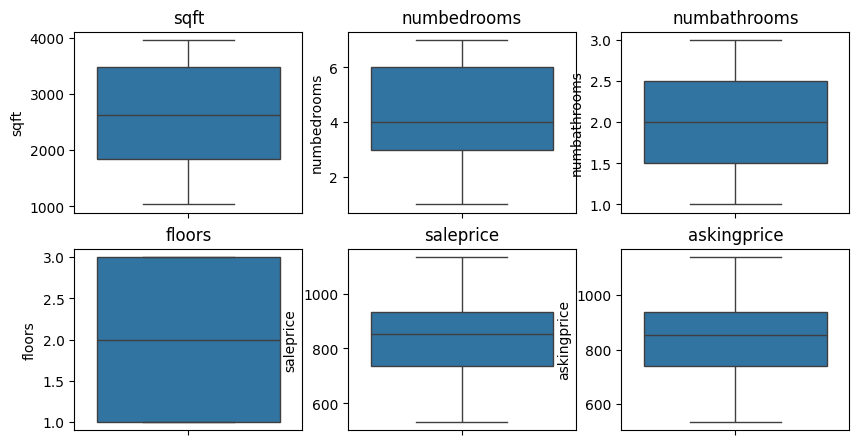

In [ ]:
# create boxplots for all numeric columns
plt.figure(figsize=(10, 8))
columns_to_check = ['sqft', 'numbedrooms', 'numbathrooms', 'floors', 'saleprice', 'askingprice']

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data[column])
    plt.title(column)

plt.show()

There are no NANs. There doesn't appear to be any outliers. But, there are points above the upper limits for the sale and asking prices. Hoowver, they could just be properties with a price above the typical range and not an outlier.

##Do properties with a view generally have higher sale prices?

view
False    810.875000
True     866.970588
Name: saleprice, dtype: float64
The price with a view is an average of $56k higher than without a view.


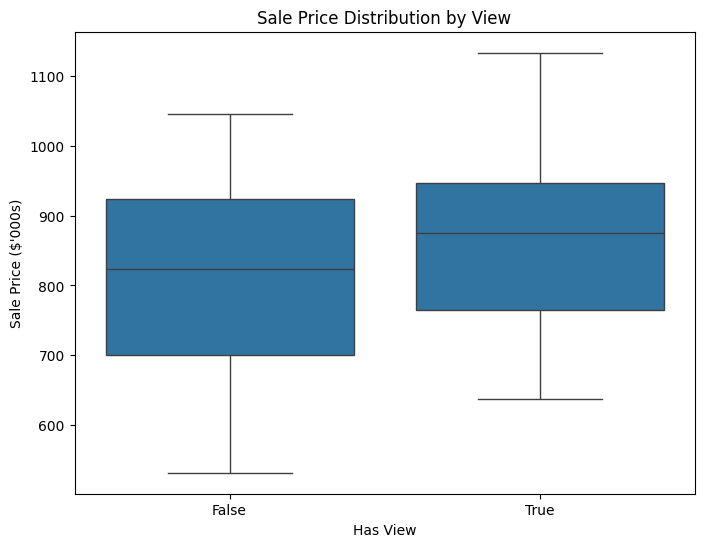

In [ ]:
# Comparing average sale prices of properties with and without a view
view_sale_price = data.groupby('view')['saleprice'].mean()
print(view_sale_price)
price_difference = view_sale_price[True] - view_sale_price[False]
print(f"The price with a view is an average of ${price_difference:,.0f}k higher than without a view.")

# Boxplot to visualize the comparison.
plt.figure(figsize=(8, 6))
sns.boxplot(x='view', y='saleprice', data=data)
plt.title('Sale Price Distribution by View')
plt.xlabel('Has View')
plt.ylabel('Sale Price ($\'000s)')
plt.show()

##How many properties are in each district?

In [ ]:
# Count of properties in each district
properties_per_district = data['district'].value_counts()

#print results
print(properties_per_district)

district
south    44
west     39
east     33
north    32
Name: count, dtype: int64


The south district has 44 properties, the west has 39, the east has 33, and the north district has 32 properties.

##Histogram of Sale Prices

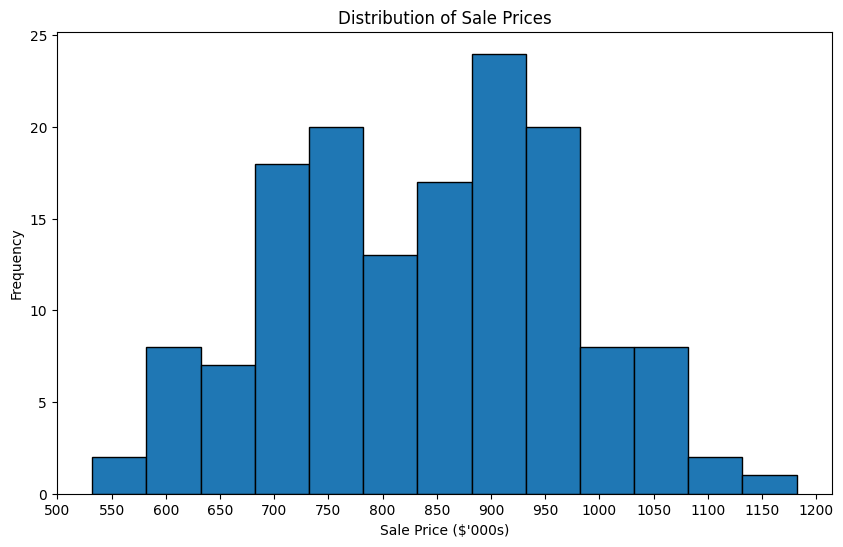

In [ ]:
# Create bin edges
bin_edges = np.arange(data['saleprice'].min(), data['saleprice'].max() + 50, 50)

# Plot histogram of sale prices
plt.figure(figsize=(10, 6))
plt.hist(data['saleprice'], bins=bin_edges, edgecolor='black')
plt.xticks(np.arange(500, 1201, 50))
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($\'000s)')
plt.ylabel('Frequency')
plt.show()

#Coorelations

## Coorelation Matrix

Correlation Matrix:
               zipcode      sqft  numbedrooms  numbathrooms    floors  \
zipcode       1.000000  0.033988     0.104172     -0.016358  0.037943   
sqft          0.033988  1.000000     0.226327      0.011083  0.073868   
numbedrooms   0.104172  0.226327     1.000000     -0.101414  0.002868   
numbathrooms -0.016358  0.011083    -0.101414      1.000000  0.014194   
floors        0.037943  0.073868     0.002868      0.014194  1.000000   
saleprice     0.060766  0.845776     0.213391      0.297723  0.456272   
askingprice   0.060908  0.845354     0.213733      0.298164  0.456651   

              saleprice  askingprice  
zipcode        0.060766     0.060908  
sqft           0.845776     0.845354  
numbedrooms    0.213391     0.213733  
numbathrooms   0.297723     0.298164  
floors         0.456272     0.456651  
saleprice      1.000000     0.999995  
askingprice    0.999995     1.000000  


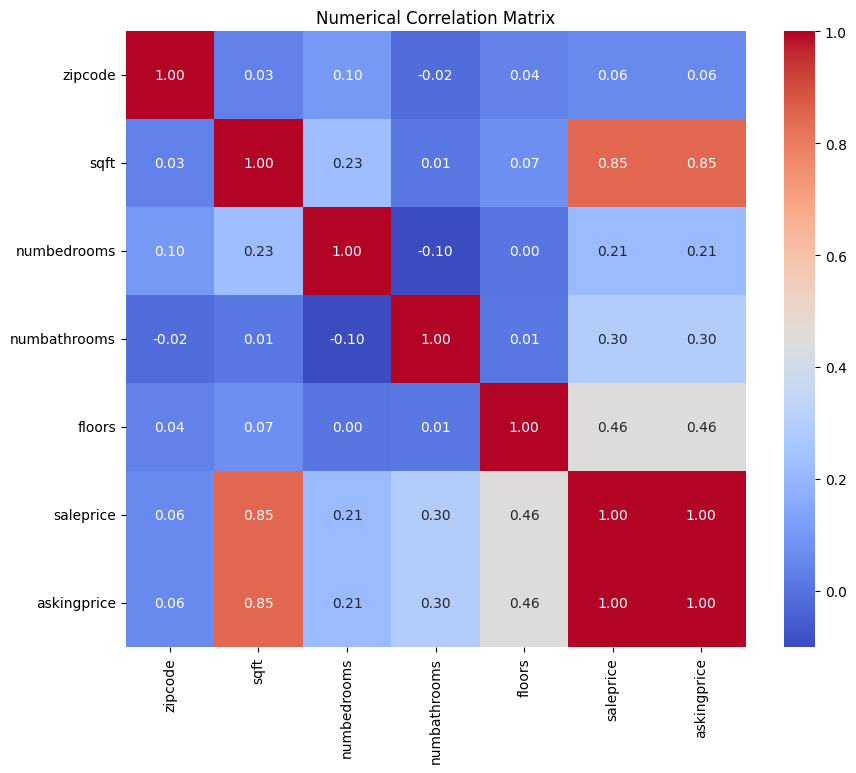

In [ ]:
# Filter for numeric data only
numeric_data = data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Numerical Correlation Matrix')
plt.show()


##Pair Plot

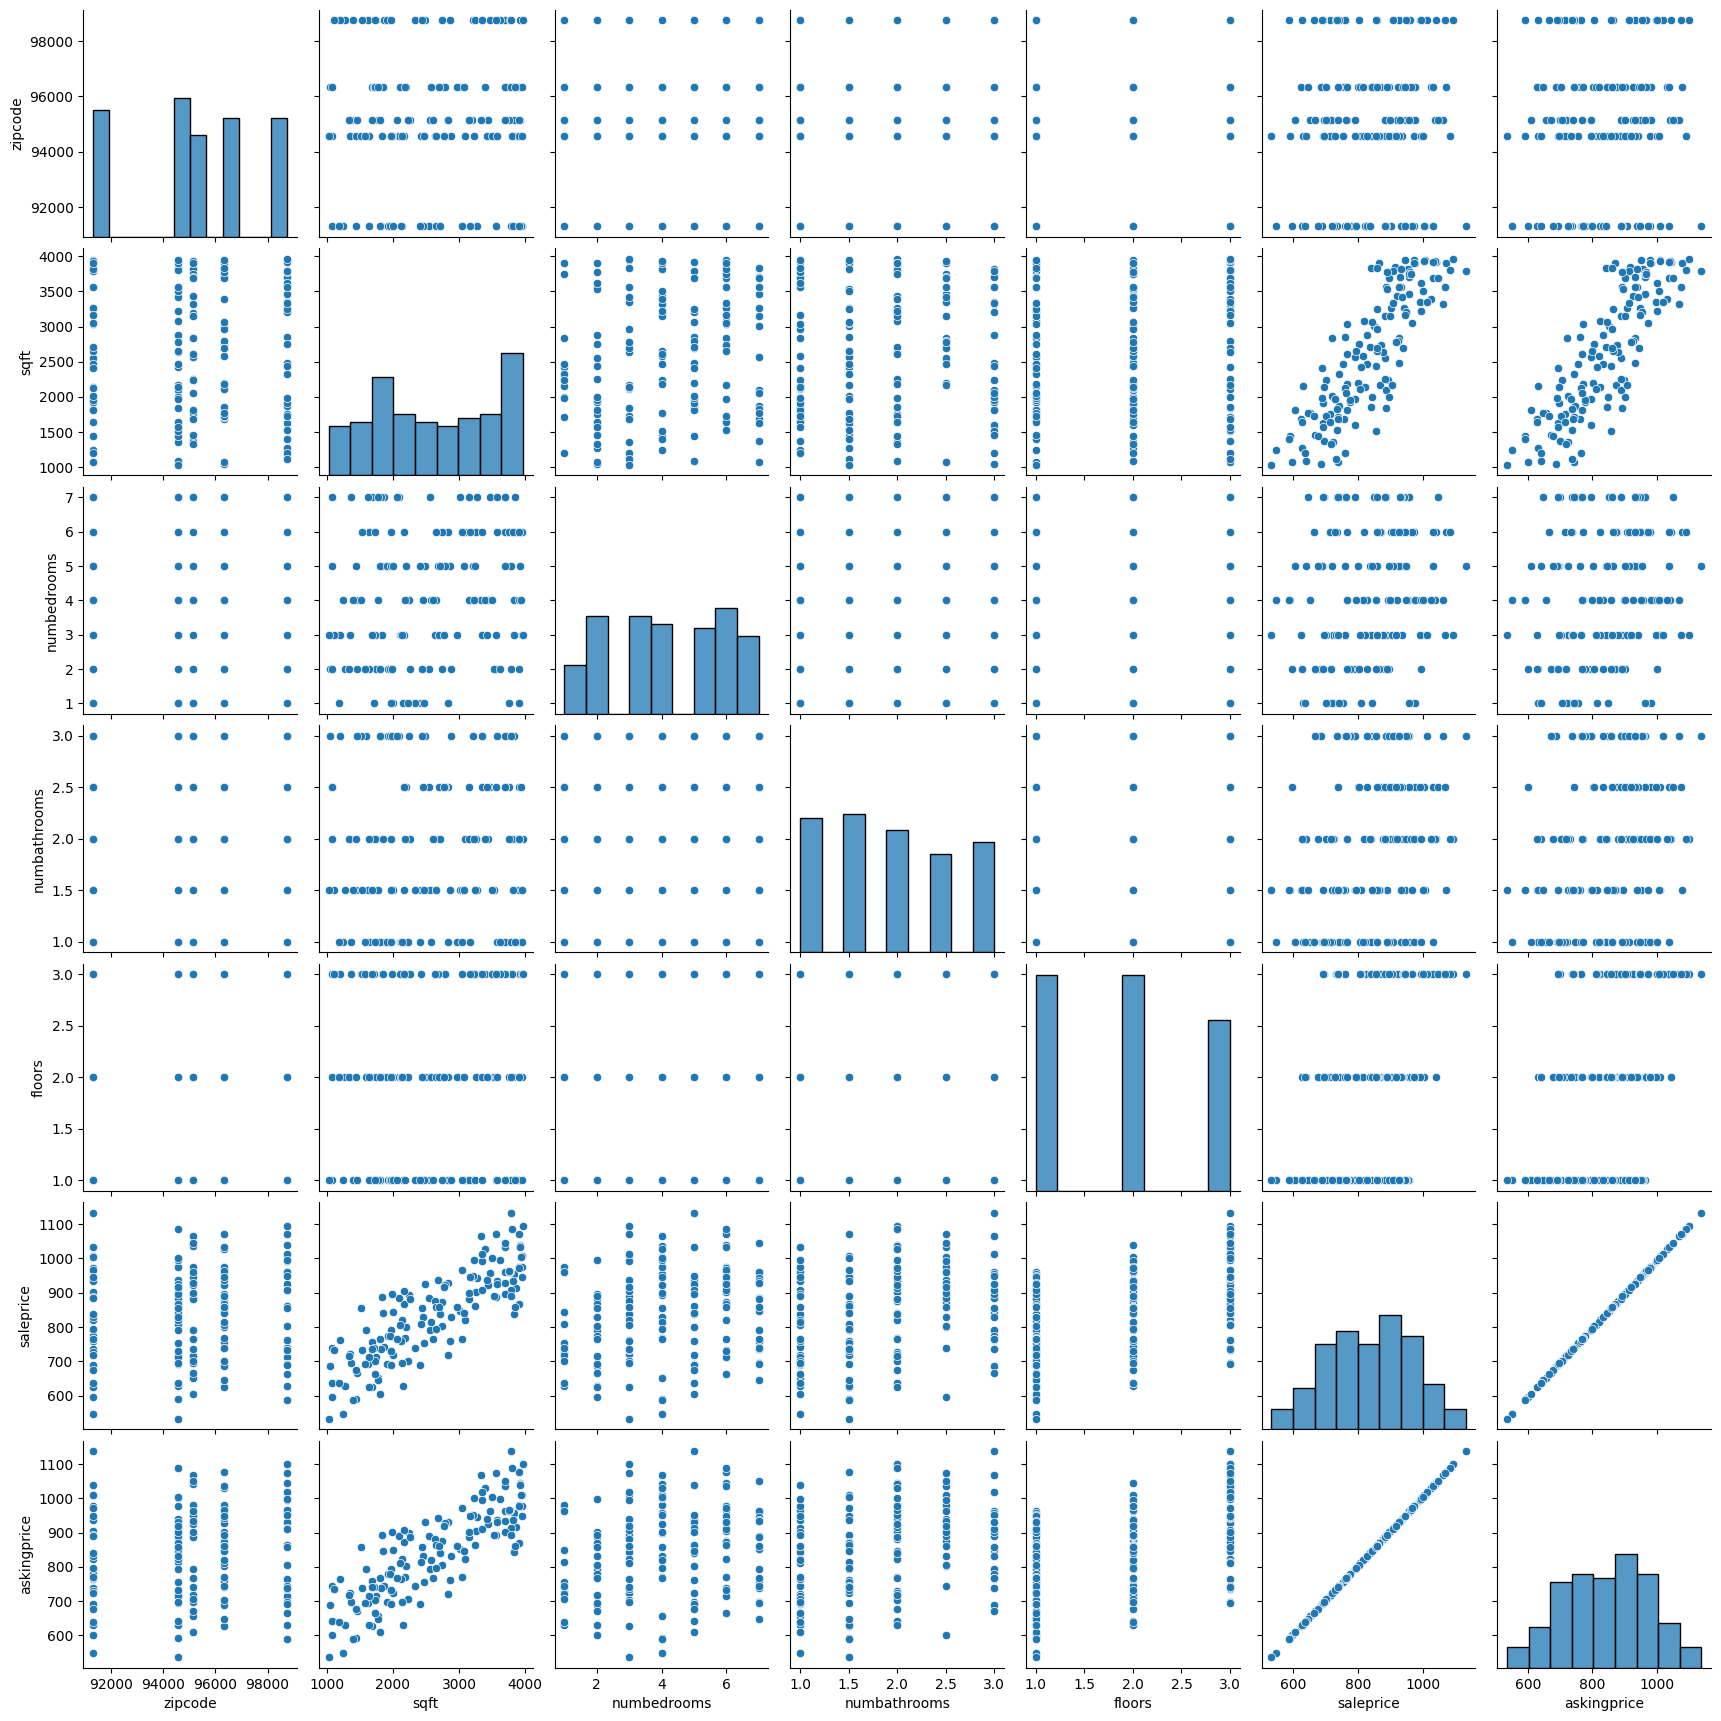

In [ ]:
relevant_features = correlation_matrix.columns[(correlation_matrix.abs() > 0.8).any()].tolist()
sns.pairplot(numeric_data[relevant_features])

##About Coorelations

There is no correlation (0.033988) between zipcode and sqft, indicating that larger properties aren't consistently found in specific zip codes.

Sqft and Saleprice have a very strong positive correlation (0.845776). This indicates that larger properties tend to have higher sale prices.

Numbedrooms and saleprice have a weak positive correlation (0.213391), suggesting that properties with more bedrooms tend to sell for more, but this relationship isn't strong.

Numbathrooms has a weak positive correlation (0.297723), but higher than numbedrooms, suggesting that the number of bathrooms is a more significant price factor compared to the number of bedrooms.

Floors and saleprice have a moderate positive correlation (0.456272), indicating that properties with more floors tend to have higher sale prices.

Saleprice and askingprice have a very strong positive correlation (0.999995), indicating that the asking prices are almost exactly predictive of sale prices.


There is a negative correlation (-0.101414) between numbedrooms and numbathrooms, indicating that properties with more bedrooms tend not to have proportionally more bathrooms.

Floors show very weak correlations with both numbedrooms (0.002868) and numbathrooms (0.014194), suggesting that the number of floors in a property does not necessarily correlate strongly with the number or layout of bedrooms and bathrooms.



## Plots of meaningful coorelations

###Plot of sqft and saleprice

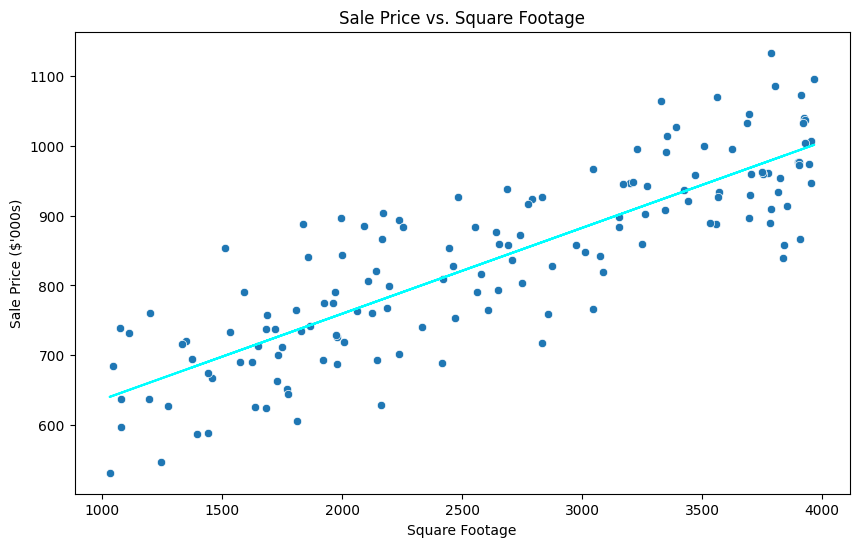

Correlation coefficient between square footage and sale price: 0.85
Slope: 0.12285243861254021
Intercept: 513.8937102283439


In [ ]:
slope, intercept = np.polyfit(data['sqft'], data['saleprice'], 1)

# Plotting square footage against sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft', y = 'saleprice', data=data)
plt.plot(data['sqft'], slope*data['sqft'] + intercept, color='cyan', label='Regression Line')
plt.title('Sale Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Sale Price ($\'000s)')
plt.show()

# Calculating correlation coefficient
correlation_sqft_saleprice = data['sqft'].corr(data['saleprice'])
print(f"Correlation coefficient between square footage and sale price: {correlation_sqft_saleprice:,.2}")

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

With a correlation coefficient of 0.85. There is a coorelation between the square footage and the sale price. Where properties with more square footage have a higher sales price. Additionally, with an intercept of 513.9, this tells us that the expected sales price of land, or when the square footage is 0 is $$513,893. And, on average, the sale price increases by $123 by each extra square foot.


###Plot of floors and saleprice

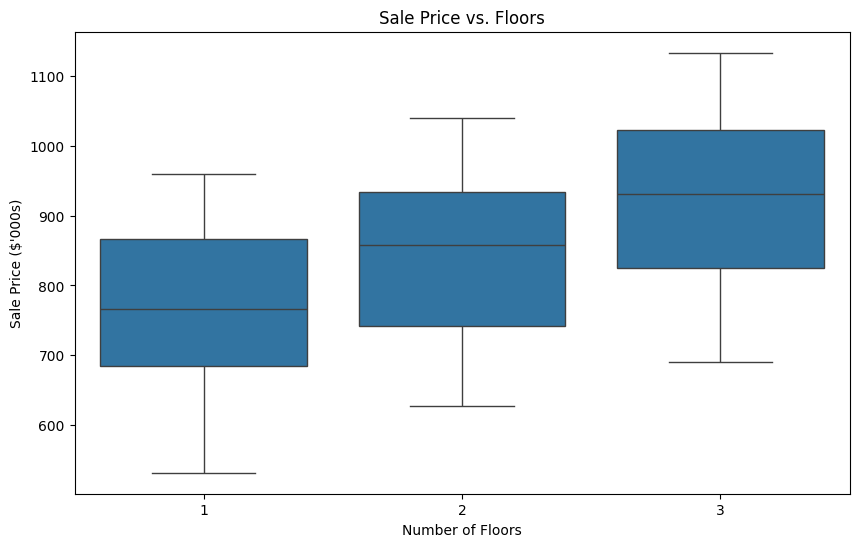

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='floors', y = 'saleprice', data=data)
plt.title('Sale Price vs. Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Sale Price ($\'000s)')
plt.show()

There is a moderate coorelation between the saleprice and number of floors of the home. With homes with more floors selling for a higher average price, and having a higher minimum sales price.

###Plot of askingprice and saleprice

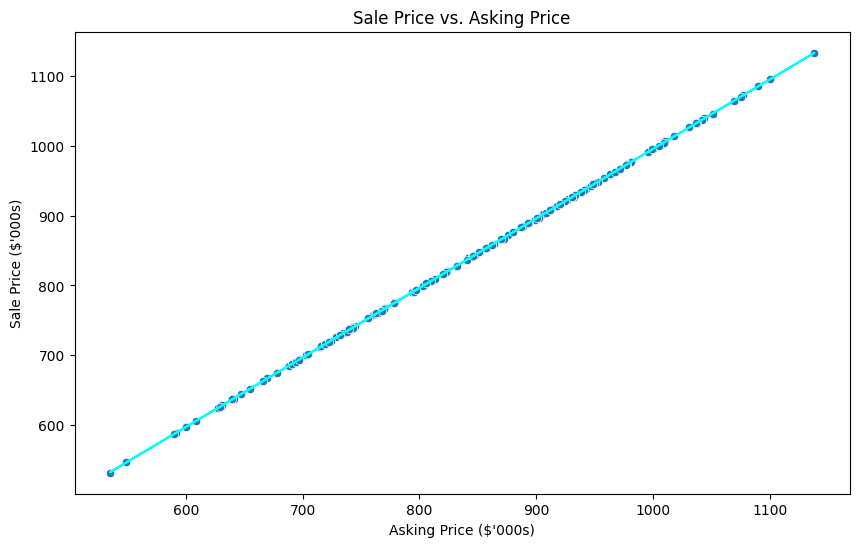

In [ ]:
slope, intercept = np.polyfit(data['askingprice'], data['saleprice'], 1)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='askingprice', y = 'saleprice', data=data)
plt.plot(data['askingprice'], slope*data['askingprice'] + intercept, color='cyan', label='Regression Line')
plt.title('Sale Price vs. Asking Price')
plt.xlabel('Asking Price ($\'000s)')
plt.ylabel('Sale Price ($\'000s)')
plt.show()

Saleprice and askingprice have a very strong positive correlation (0.999995), indicating that the asking prices are almost exactly predictive of sale prices.

#Histograms of Each Relevant Feature

##Histogram of saleprice

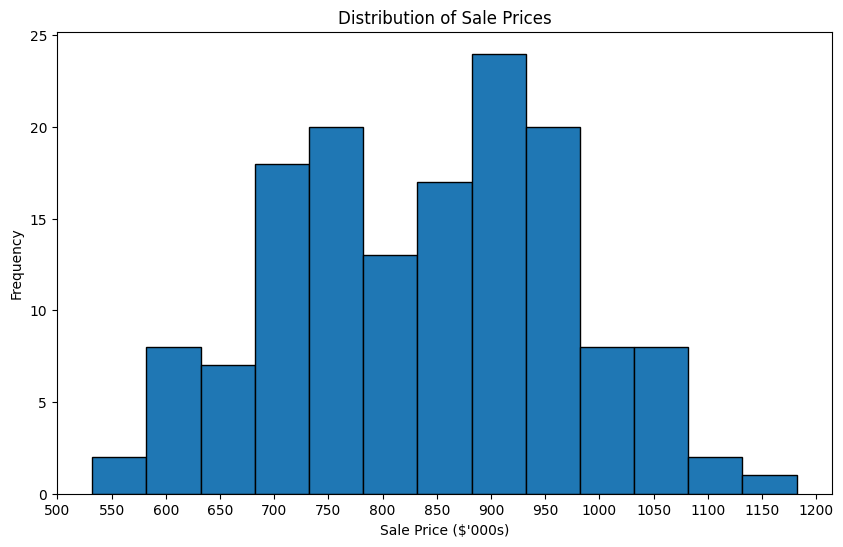

In [ ]:
# Create bin edges
bin_edges = np.arange(data['saleprice'].min(), data['saleprice'].max() + 50, 50)

# Plot histogram of sale prices
plt.figure(figsize=(10, 6))
plt.hist(data['saleprice'], bins=bin_edges, edgecolor='black')
plt.xticks(np.arange(500, 1201, 50))
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($\'000s)')
plt.ylabel('Frequency')
plt.show()

##Histogram of askingprice

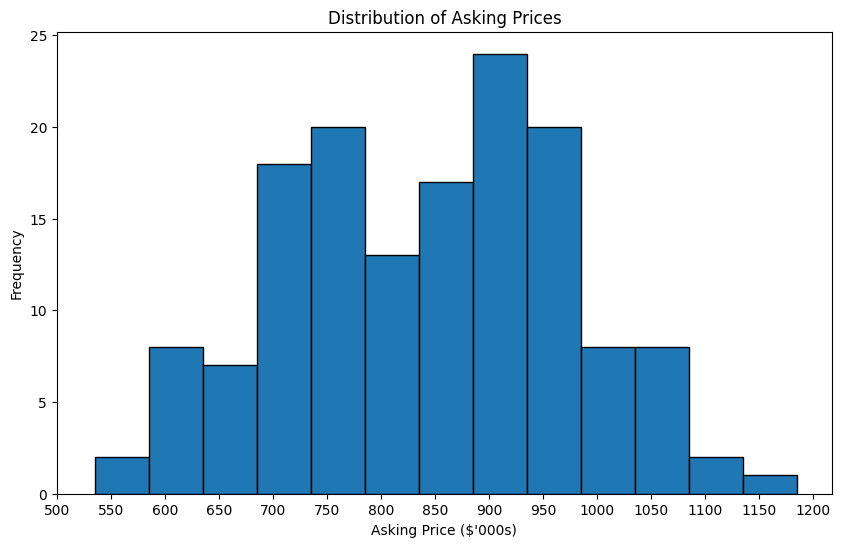

In [ ]:
# Create bin edges
bin_edges = np.arange(data['askingprice'].min(), data['askingprice'].max() + 50, 50)

# Plot histogram of sale prices
plt.figure(figsize=(10, 6))
plt.hist(data['askingprice'], bins=bin_edges, edgecolor='black')
plt.xticks(np.arange(500, 1201, 50))
plt.title('Distribution of Asking Prices')
plt.xlabel('Asking Price ($\'000s)')
plt.ylabel('Frequency')
plt.show()

##Histogram of sqft

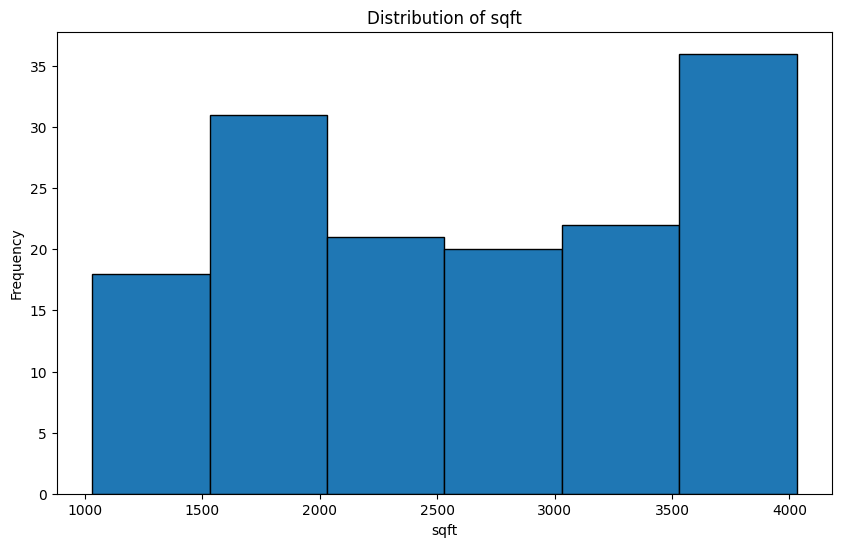

In [ ]:
# Create bin edges
bin_edges = np.arange(data['sqft'].min(), data['sqft'].max() + 500, 500)

# Plot histogram of sale prices
plt.figure(figsize=(10, 6))
plt.hist(data['sqft'], bins=bin_edges, edgecolor='black')
#plt.xticks(np.arange(500, 1201, 50))
plt.title('Distribution of sqft')
plt.xlabel('sqft')
plt.ylabel('Frequency')
plt.show()

The 3500-4000 sqft range has the highest number of homes, totaling 35. The next most populous category is 1500-2000 sqft, with 31 homes. The remaining categories show similar numbers of homes for each 500 sqft increment.

##Histogram of Number of Bedrooms

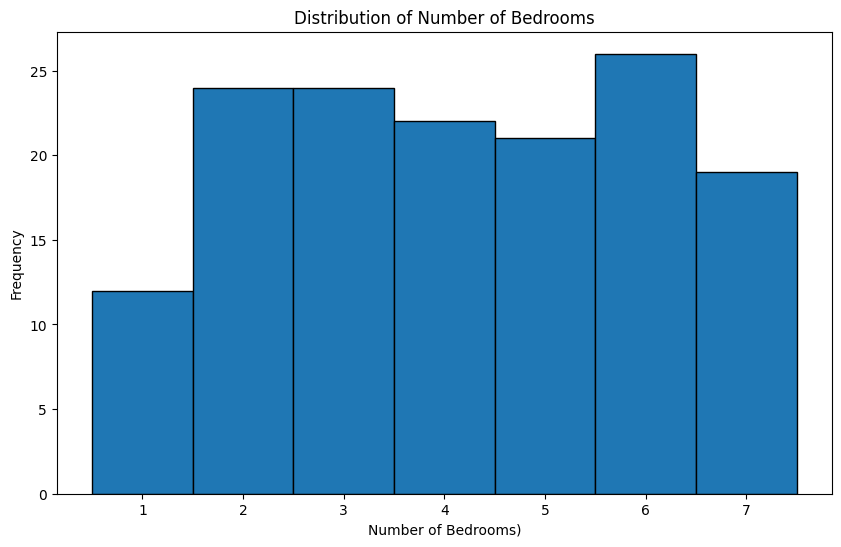

In [ ]:
# Create bin edges
bin_edges = np.arange(data['numbedrooms'].min() - 0.5, data['numbedrooms'].max() + 1.5)
# Plot histogram of sale price
plt.figure(figsize=(10, 6))
plt.hist(data['numbedrooms'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of Number of Bedrooms')
plt.xticks(np.arange(data['numbedrooms'].min(), data['numbedrooms'].max() + 1))  #
plt.xlabel('Number of Bedrooms)')
plt.ylabel('Frequency')
plt.show()

Homes with 6 bedrooms are the most common, while 1-bedroom homes are the least common. The distribution of homes across other bedroom counts is relatively uniform.

##Histogram of Number of Bathrooms

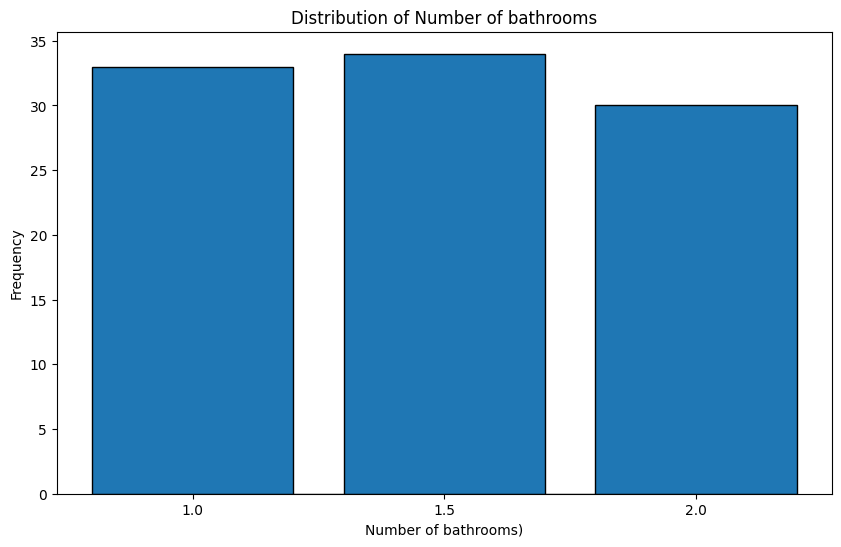

In [ ]:
# Create bin edges
bin_edges = [0.8, 1.2, 1.3,1.7, 1.8, 2.2]
# Plot histogram of sale prices
plt.figure(figsize=(10, 6))
plt.hist(data['numbathrooms'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of Number of bathrooms')
plt.xlabel('Number of bathrooms)')
plt.xticks([1, 1.5, 2])
plt.ylabel('Frequency')
plt.show()

Homes with 1.5 bathrooms are the most common, while 2.0 bathrooms are the least common. However, the distribution across all categories is relatively uniform.

##Histogram of Number of Floors

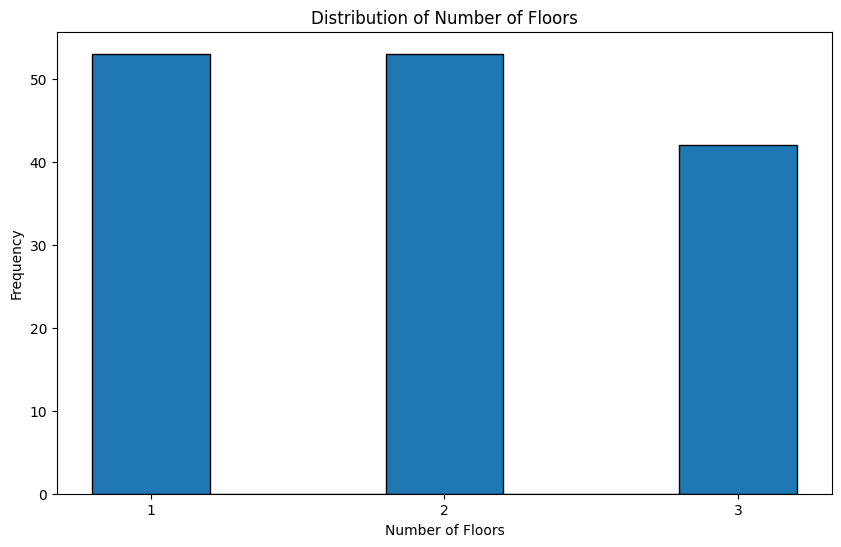

In [ ]:
# Create bin edges
bin_edges = [0.8, 1.2, 1.8, 2.2, 2.8, 3.2]
# Plot histogram of sale prices
plt.figure(figsize=(10, 6))
plt.hist(data['floors'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of Number of Floors')
plt.xlabel('Number of Floors')
plt.xticks([1, 2, 3])
plt.ylabel('Frequency')
plt.show()

The least common are homes with 3 floors, while homes with 1 and 2 floors are approximately equally common.

##Histogram of Zipcode

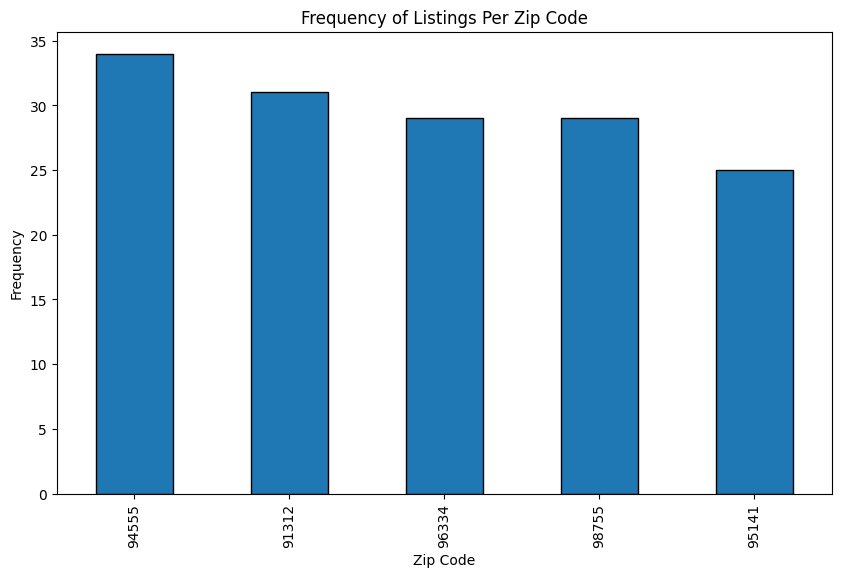

In [ ]:
# Plotting the frequencies of each zip code
plt.figure(figsize=(10, 6))
zipcode_counts = data['zipcode'].value_counts()
zipcode_counts.plot(kind='bar', edgecolor='black')
plt.title('Frequency of Listings Per Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Frequency')
plt.show()

Zip code 94555 has the highest number of homes for sale, while 95141 has the fewest. The distribution of homes for sale across the other zip codes is relatively uniform."

# Pivot Tables

##Sale Price by Zip Code and Number of Bedrooms

This grouping helps in understanding how the properties size and location influence the sales price.

In [ ]:
bins = [0, 1000, 1500, 2000, 2500, 3000, 3500 ,4000,4500, 5000, 5500, 6000]  # Adjust the maximum bin value based on your data's maximum sqft
labels = ['0-1000', '1000-1500','1500-2000', '2000-2500','2500-3000', '3000-3500', '3500-4000', '4000-4500','4500-5000', '5000-5500','5500-6000']

data['sqft_range'] = pd.cut(data['sqft'], bins=bins, labels=labels, right=False)

pivot_sale_price = pd.pivot_table(data, values='saleprice', index='zipcode', columns='sqft_range', aggfunc='mean')
pivot_sale_price


sqft_range,1000-1500,1500-2000,2000-2500,2500-3000,3000-3500,3500-4000
zipcode,,,,,,
91312,614.000000,741.714286,763.200000,838.00,904.600000,995.857143
94555,620.000000,794.714286,788.285714,869.75,917.000000,936.444444
95141,692.666667,665.000000,810.750000,800.00,942.600000,983.500000
96334,712.000000,717.500000,809.750000,877.50,905.333333,954.125000
98755,677.000000,703.285714,840.000000,781.00,946.500000,1004.142857


###Heat Map and Bar plot of Average Sale price by SQFT and Zip Code.

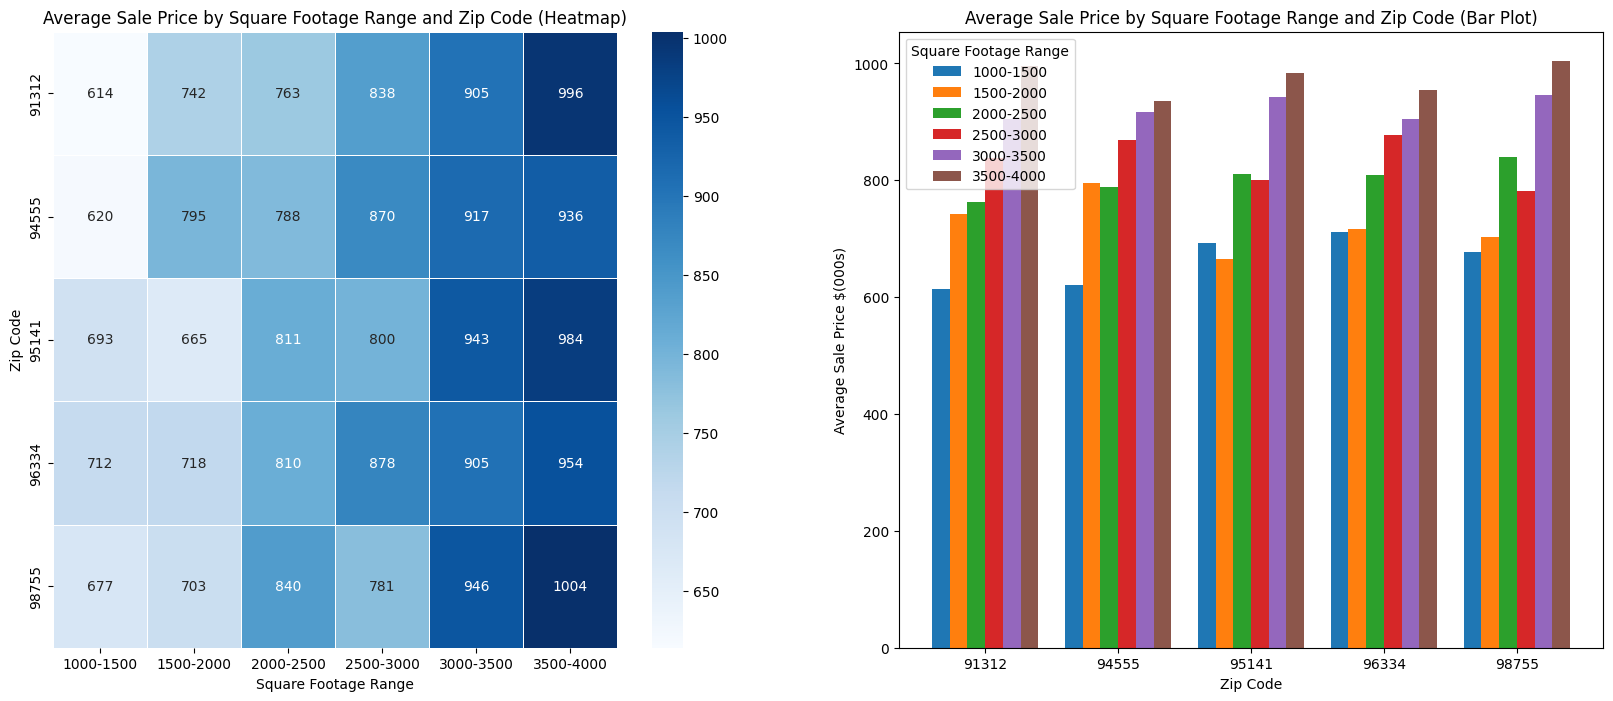

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))  # Two rows, one column

# Plotting the heatmap on the first ax

sns.heatmap(pivot_sale_price, annot=True, fmt=".0f", cmap='Blues', linewidths=.5, ax=ax1)
ax1.set_title('Average Sale Price by Square Footage Range and Zip Code (Heatmap)')
ax1.set_xlabel('Square Footage Range')
ax1.set_ylabel('Zip Code')



# Plotting the bar plot on the second ax

pivot_sale_price.plot(kind='bar', ax=ax2, width=0.8)
ax2.set_title('Average Sale Price by Square Footage Range and Zip Code (Bar Plot)')
ax2.set_xlabel('Zip Code')
ax2.set_ylabel('Average Sale Price $(000s)')
ax2.tick_params(axis='x', rotation=0)
ax2.legend(title='Square Footage Range')

plt.show()

The vertical axis lists the zip codes. The horizontal axis shows the range of property sizes in sqft divided into 3 categories. Each cell in the grid shows the average sale price for properties that fall witihin the sqft and zip code range of the cell. The Color intensity reflects the sale price level. Darker blues indicate higher prices, and lighter blues indicate lower prices.

You can see from the heat map that there seems to be a general trend of price increase with size. However, zipcodes 94555 and 98755 have slightly lower prices for 2500-3000 sqft than 2000-2500 sqft.

Some zipcodes show a more pronounced increase in sale price as sqft increases, while others have more gradual increase.

The most expensive properties are all consistently those in the 3500-4000 sqft range.

##Average Sale Price and Asking Price by District

In [ ]:
pivot_price_comparison = pd.pivot_table(data, values=['askingprice', 'saleprice'], index='district', aggfunc='mean')
pivot_price_comparison

,askingprice,saleprice
district,,
east,844.969697,841.030303
north,808.406250,804.812500
south,838.909091,835.045455
west,864.846154,860.871795


## Square Footage by Number of Bedrooms and Bathrooms
to udnerstand the property size configurations

In [ ]:
pivot_sqft = pd.pivot_table(data, values='sqft', index=['numbedrooms', 'numbathrooms'], aggfunc='mean')
pivot_sqft

sqft
numbedrooms numbathrooms             
1           1.0           2105.750000
            1.5           2235.250000
            2.0           1976.000000
            2.5           3828.000000
            3.0           2000.000000
2           1.0           2993.666667
            1.5           2904.000000
            2.0           1743.500000
            2.5           2483.250000
            3.0           1906.900000
3           1.0           2554.000000
            1.5           1892.400000
            2.0           2421.750000
            2.5           2995.000000
            3.0           2128.666667
4           1.0           1864.666667
            1.5           2246.750000
            2.0           3235.625000
            2.5           3182.000000
            3.0           2725.750000
5           1.0           2789.142857
            1.5           2796.750000
            2.0           1954.800000
            2.5           2492.500000
            3.0           3160.000000
6           1.0           2885.000000
            1.5           2881.250000
            2.0           3655.285714
            2.5           3087.666667
            3.0           3455.000000
7           1.0           2662.000000
            1.5           2320.833333
            2.0           3152.000000
            2.5           2984.500000
            3.0           2420.000000

As the number of bedrooms increases, the square footage tends to increase as well, which is expected as more bedrooms generally equate to larger homes. However, there are exceptions. Within the same bedroom category, the size of the home can vary significantly with different numbers of bathrooms. For example, one bedroom homes with 2.5 bathrooms have an average of 3828 sqft, which is larger than one-bedroom homes with fewer bathrooms.
The largest average properties within this dataset are six-bedroom homes with 2.0 bathrooms, averaging 3655 sqft.
The smallest are four-bedroom homes with 1.0 bathrooms, at 1865 sqft on average.

## Comparison of Views and Sale Prices

In [ ]:
pivot_views = pd.pivot_table(data, values='saleprice', index='view', aggfunc=['mean', 'count'])
pivot_views


,mean,count
,saleprice,saleprice
view,,
False,810.875000,80
True,866.970588,68


Those without views sell more and have a lower mean salesprice than those with views.

##Price Per Square Foot by Zip Code



In [ ]:
pivot_ppsf = pd.pivot_table(data, values=['saleprice'], index='zipcode', aggfunc=lambda x: (x / data['sqft']).mean())
pivot_ppsf

,saleprice
zipcode,
91312,0.344979
94555,0.358590
95141,0.332069
96334,0.348043
98755,0.351116


zipcode 95141 has the lowest price per sqft. zipcode 94555 has the highest price per sqft.

##Frequency of Sales by Number of Bathrooms and Floors

In [ ]:
pivot_bath_floors = pd.pivot_table(data, values='saleprice', index=['numbathrooms', 'floors'], aggfunc='count')
pivot_bath_floors

saleprice
numbathrooms floors           
1.0          1              13
             2              13
             3               7
1.5          1              13
             2              10
             3              11
2.0          1               8
             2              12
             3              10
2.5          1               6
             2              12
             3               6
3.0          1              13
             2               6
             3               8

Homes with 1 bathroom across different floor numbers show a relatively high number of sales, especially for 1 floor homes (13 sales), indicating a possibly higher demand or availability for such configurations. They also have the highest number of sales on 1 and 2 floors. The number of sales for homes with more bathrooms does fluctuate with the number of floors, but generally, there is no clear trend that more bathrooms lead to more sales. Three-floor homes have less sales compared to those with fewer floors, which may suggest lower availability of such configurations.

## Sales Distribution by View and District

In [ ]:
pivot_view_district = pd.pivot_table(data, values='saleprice', index=['view', 'district'], aggfunc='mean')
pivot_view_district


saleprice
view  district            
False east      791.533333
      north     807.380952
      south     819.250000
      west      819.000000
True  east      882.277778
      north     799.909091
      south     854.000000
      west      904.947368

Properties with a view generally have higher sale prices compared to those without. The west district has the highest average sale prices among properties with a view, reaching up to $904,947. South and west districts have relatively higher prices even for properties without a view compared to the east and north districts. Within each district, the presence of a view significantly influences the property values, except in the north where the trend reverses.

##Average Property Size by District

In [ ]:
pivot_avg_size = pd.pivot_table(data, values='sqft', index='district', aggfunc='mean')
pivot_avg_size


,sqft
district,
east,2735.030303
north,2544.187500
south,2538.181818
west,2704.410256


The south district has the lowest average sqft in the homes sold. The East and West districts appear to offer larger properties on average.

#Queries

##What is the cheapest home?

In [ ]:
data[data['saleprice'] == data['saleprice'].min()]


,zipcode,district,sqft,numbedrooms,numbathrooms,floors,view,saleprice,askingprice,sqft_category
135,94555,east,1031,3,1.5,1,False,532,535,1001-2000


The cheapest home sold for 532k. It had 3 bedrooms and 1.5 bathrooms with 1 foor and no view. It had 1031 sqft, and was located in Fremont, CA.


## Display the number of homes with at least 4 bedrooms.

In [ ]:
data[data['numbedrooms'] >= 4]


,zipcode,district,sqft,numbedrooms,numbathrooms,floors,view,saleprice,askingprice,sqft_category
0,95141,west,1373,7,1.0,3,False,695,698,1001-2000
1,91312,south,3261,6,2.0,2,False,902,906,3001-4000
3,95141,east,2833,6,2.5,2,True,927,932,2001-3000
4,96334,south,2742,6,2.5,2,False,872,876,2001-3000
5,96334,north,2195,5,2.5,2,False,799,803,2001-3000
...,...,...,...,...,...,...,...,...,...,...
137,91312,south,2009,5,1.5,1,True,719,723,2001-3000
139,94555,west,1975,6,1.5,2,False,729,732,1001-2000
142,98755,north,1729,6,1.0,1,True,663,666,1001-2000
144,95141,south,2061,7,3.0,1,False,764,768,2001-3000


There are 88 homes with 4 or more bedrooms. There are 22 homes with 4 bedrooms, 21 homes with 5 bedrooms, 26 homes with 6 bedrooms, 19 homes with 7 bedrooms. They are all distributed equally between the 4 districts, and have a square footage between 1000 - 4000.

## Homes that have a view and are under 750k

In [ ]:
data[(data['view'] == True) & (data['saleprice'] < 750)]


,zipcode,district,sqft,numbedrooms,numbathrooms,floors,view,saleprice,askingprice,sqft_category
11,98755,north,1865,7,1.0,2,True,742,745,1001-2000
33,95141,east,1769,4,1.0,1,True,652,655,1001-2000
35,96334,west,1044,2,3.0,1,True,685,688,1001-2000
46,91312,south,1976,1,2.0,1,True,726,729,1001-2000
51,94555,south,1349,3,2.0,2,True,721,724,1001-2000
83,96334,east,1732,3,2.0,1,True,700,703,1001-2000
86,98755,north,2331,1,1.5,1,True,740,743,2001-3000
110,94555,south,1647,6,1.0,2,True,713,716,1001-2000
112,95141,south,1333,2,2.0,2,True,716,719,1001-2000
125,98755,north,1980,5,1.0,1,True,688,691,1001-2000


There are 14 homes that have a view and are under 750k. They all range between 1000-3000 sqft.